         Name  StudyHours  Grade   Pass
0         Dan       10.00   50.0  False
1       Joann       11.50   50.0  False
2       Pedro        9.00   47.0  False
3       Rosie       16.00   97.0   True
4       Ethan        9.25   49.0  False
5       Vicky        1.00    3.0  False
6    Frederic       11.50   53.0  False
7      Jimmie        9.00   42.0  False
8      Rhonda        8.50   26.0  False
9    Giovanni       14.50   74.0   True
10  Francesca       15.50   82.0   True
11      Rajab       13.75   62.0   True
12    Naiyana        9.00   37.0  False
13       Kian        8.00   15.0  False
14      Jenny       15.50   70.0   True
15     Jakeem        8.00   27.0  False
16     Helena        9.00   36.0  False
17      Ismat        6.00   35.0  False
18      Anila       10.00   48.0  False
19       Skye       12.00   52.0  False
20     Daniel       12.50   63.0   True
21      Aisha       12.00   64.0   True
Minimum: 3.00
Mean:49.18
Median:49.50
Maximum:50.00



C:\Users\bkira\AppData\Local\Temp\ipykernel_5516\699033906.py:60: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


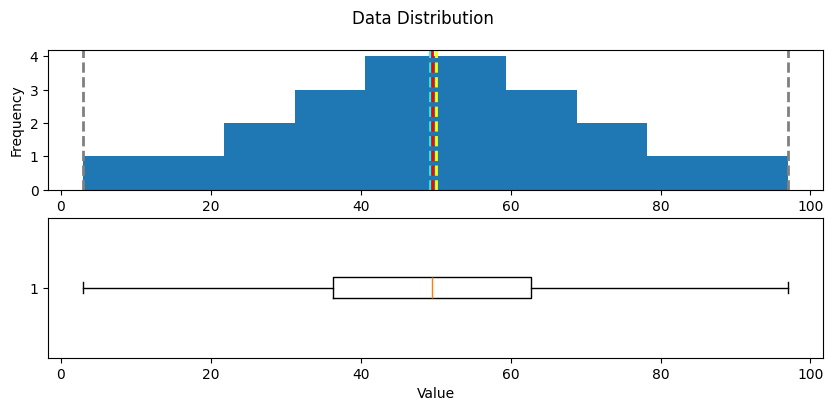

In [22]:
import pandas as pd
import urllib.request
from matplotlib import pyplot as plt

# Download the file using urllib
url = "https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv"
urllib.request.urlretrieve(url, "grades.csv")

# Load data from the downloaded file
df_students = pd.read_csv('grades.csv', delimiter=',', header='infer')

#Remove any rows with missing data
df_students = df_students.dropna(axis=0, how='any')

#Calculate who passed, assuming '60'is the grade needed to pass
passes = pd.Series(df_students['Grade'] >= 60)

#Save who passed to the Pandas dataframe
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)

print(df_students)

#Create a function that we can re-use
def show_distribution(var_data):
    '''
    This function will make a distribution (graph) and display it
    '''

    #Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]
    
    print('Minimum: {:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMaximum:{:.2f}\n'.format(min_val, mean_val, med_val, mod_val, max_val))

    #Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10, 4))

    #Plot the histogram
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    #Add lines for the mean, median and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle = 'dashed', linewidth =2)
    ax[0].axvline(x=med_val, color = 'red', linestyle = 'dashed', linewidth =2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle = 'dashed', linewidth =2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle = 'dashed', linewidth =2)

    #Plot the boxplot
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    #Add a title to the Figure
    fig.suptitle('Data Distribution')

    #Show the figure
    fig.show()

show_distribution(df_students['Grade'])

Minimum: 1.00
Mean:10.52
Median:10.00
Maximum:9.00

Minimum: 3.00
Mean:49.18
Median:49.50
Maximum:50.00



C:\Users\bkira\AppData\Local\Temp\ipykernel_5516\699033906.py:60: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\bkira\AppData\Local\Temp\ipykernel_5516\699033906.py:60: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


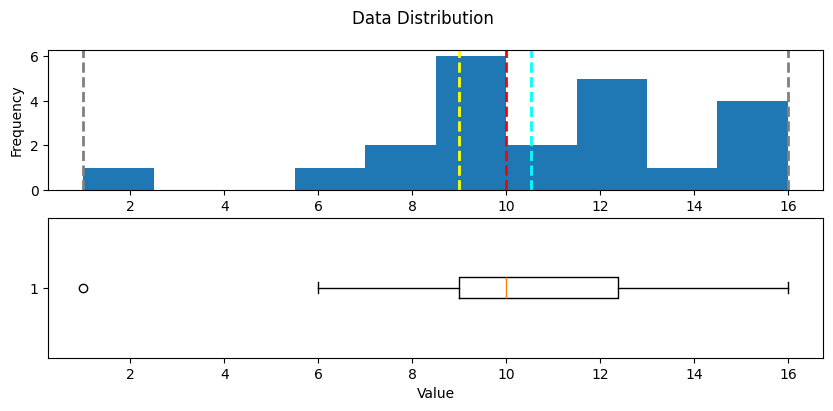

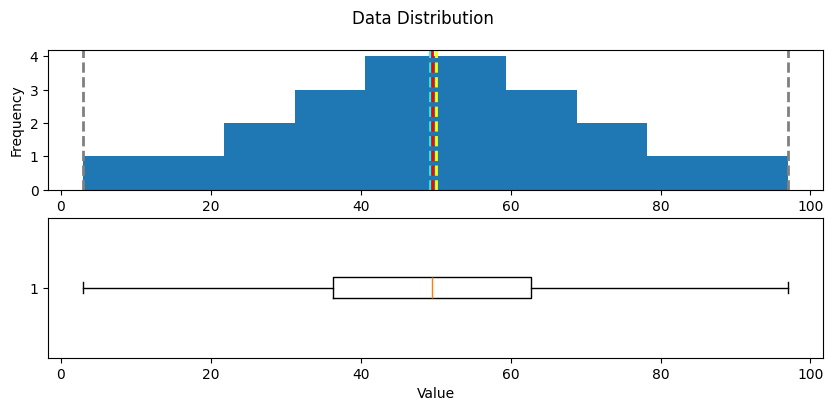

In [23]:
col = df_students['StudyHours']

show_distribution(col)

col1 = df_students['Grade']

show_distribution(col1)

Minimum: 6.00
Mean:10.98
Median:10.00
Maximum:9.00



C:\Users\bkira\AppData\Local\Temp\ipykernel_5516\699033906.py:60: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


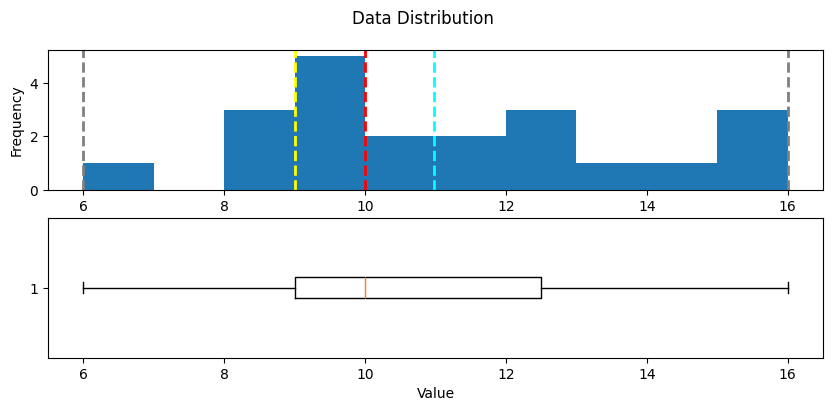

In [24]:
col =df_students[df_students.StudyHours>1]['StudyHours']

show_distribution(col)

Minimum: 6.00
Mean:10.98
Median:10.00
Maximum:9.00



C:\Users\bkira\AppData\Local\Temp\ipykernel_5516\699033906.py:60: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


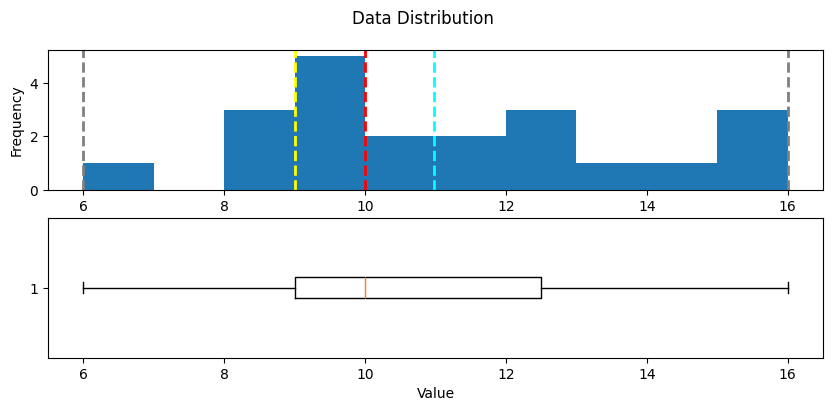

In [25]:
q01 = df_students.StudyHours.quantile(0.01)

col = df_students[df_students.StudyHours>q01]['StudyHours']

show_distribution(col)

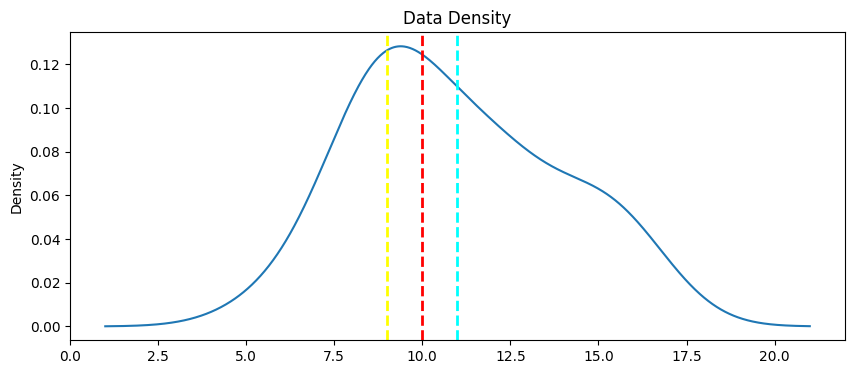

In [29]:
def show_density(var_data):
    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

# Get the density of StudyHours
show_density(col)

In [30]:
for col_name in ['Grade', 'StudyHours']:
    col = df_students[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, rng, var, std))


Grade:
 - Range: 94.00
 - Variance: 472.54
 - Std.Dev: 21.74

StudyHours:
 - Range: 15.00
 - Variance: 12.16
 - Std.Dev: 3.49


Text(114.3955526925113, 0.000553352286063513, '3 std (99.73%)')

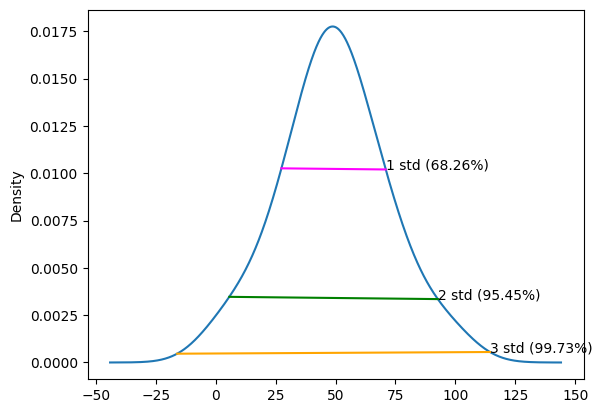

In [40]:
import scipy.stats as stats

col = df_students['Grade']

density = stats.gaussian_kde(col)

col.plot.density()

s = col.std()
m = col.mean()

x1 = [m-s, m+s]
y1 = density(x1)
plt.plot(x1, y1, color='magenta')
plt.annotate('1 std (68.26%)', (x1[1], y1[1]))

#Annotate 2 stdevs
x2 = [m-(s*2), m+(s*2)]
y2 = density(x2)
plt.plot(x2, y2, color='green')
plt.annotate('2 std (95.45%)', (x2[1],y2[1]))

#Annotate 3 stddevs
x3 = [m-(s*3), m+(s*3)]
y3 = density(x3)
plt.plot(x3, y3, color='orange')
plt.annotate('3 std (99.73%)', (x3[1], y3[1]))

In [41]:
df_students.describe()

,StudyHours,Grade
count,22.000000,22.000000
mean,10.522727,49.181818
std,3.487144,21.737912
min,1.000000,3.000000
25%,9.000000,36.250000
50%,10.000000,49.500000
75%,12.375000,62.750000
max,16.000000,97.000000


In [42]:
#Removinf the outliers'
df_sample = df_students[df_students['StudyHours']>1]
df_sample

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True
10,Francesca,15.50,82.0,True


<Axes: title={'center': 'StudyHours'}, xlabel='Pass'>

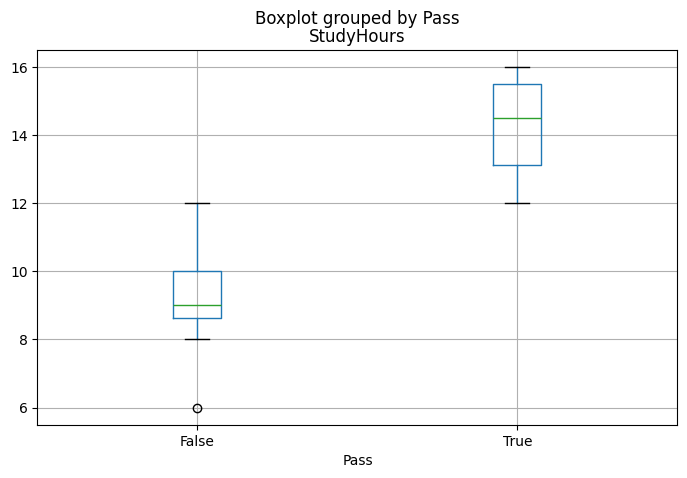

In [46]:
df_sample.boxplot(column='StudyHours', by='Pass', figsize=(8,5))

<Axes: xlabel='Name'>

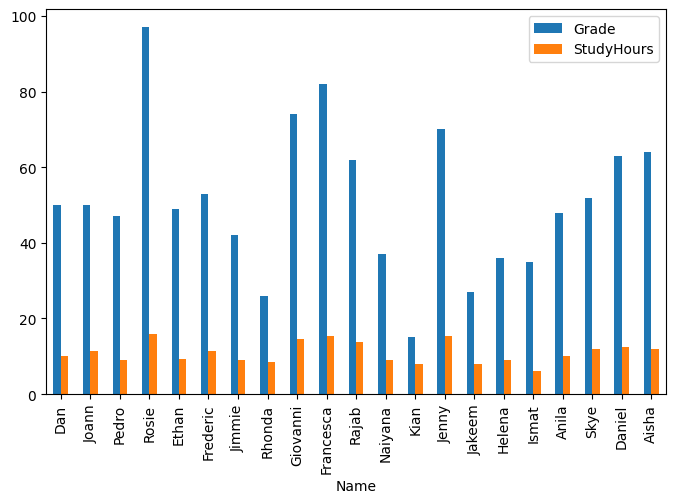

In [47]:
#Create a bar plot of name vs grade and study hours
df_sample.plot(x='Name', y=['Grade', 'StudyHours'], kind='bar', figsize=(8, 5))

<Axes: xlabel='Name'>

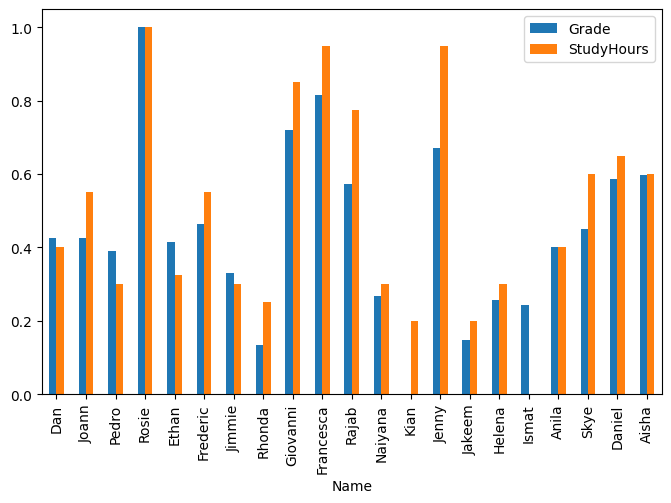

In [51]:
from sklearn.preprocessing import MinMaxScaler

# Get a scaler object
scaler = MinMaxScaler()

# Create a new dataframe for the scaled values
df_normalized = df_sample[['Name', 'Grade', 'StudyHours']].copy()

# Normalize the numeric columns
df_normalized[['Grade','StudyHours']] = scaler.fit_transform(df_normalized[['Grade','StudyHours']])

# Plot the normalized values
df_normalized.plot(x='Name', y=['Grade','StudyHours'], kind='bar', figsize=(8,5))

In [52]:
df_normalized.Grade.corr(df_normalized.StudyHours)

np.float64(0.9117666413789677)

<Axes: title={'center': 'Study Time vs Grade'}, xlabel='StudyHours', ylabel='Grade'>

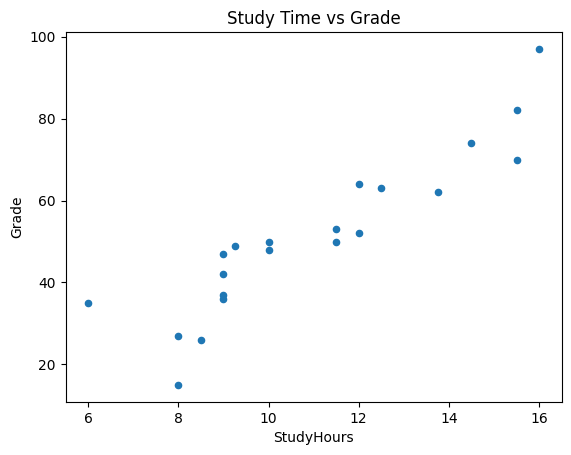

In [53]:
#Create a scatter plot
df_sample.plot.scatter(title='Study Time vs Grade', x="StudyHours", y="Grade")

In [ ]:
from scipy import stats

df_regression = df_sample[['Grade', 'StudyHours']].copy()

m, b, r, p, se = stats.linregress(df_regression['StudyHours'], df_regression['Grade'])
print('slope: {:.4f}\ny-intercept: {:.4f}'.format(m,b))
print()



slope: 6.3134
y-intercept: -17.9164
